# Soundscapy Quick Start Guide for Beginners.

Welcome to Soundscapy! This tutorial is designed for users who are new to Python and want to get started with soundscape analysis. We'll cover the basics of Python, introduce you to the key packages used in data analysis, and show you how Soundscapy makes soundscape analysis simple and accessible.

## What is Soundscapy?

Soundscapy is a Python package for analyzing and visualizing soundscape data. It provides simple, (often) one-line functions for tasks that would otherwise require many lines of complex code. Whether you're analyzing survey responses, visualizing soundscape perceptions, or calculating the Soundscape Perception Index (SPI), Soundscapy makes it easy.

## What You'll Learn

In this tutorial, you'll learn:
1. Basic Python concepts for data analysis
2. How to load and process soundscape survey data
3. How to create beautiful visualizations with a single line of code
4. How to calculate and interpret the Soundscape Perception Index (SPI)

Let's get started!


## 1. Getting Started with Python for Soundscape Analysis

### 1.1 Python Basics for Data Analysis

Python is a programming language that's widely used for data analysis. Before we dive into Soundscapy, let's cover some basic Python concepts that are essential for data analysis:

- **Variables**: Store data values that can be used and changed in your code
- **Functions**: Blocks of reusable code that perform specific tasks
- **Packages**: Collections of functions and tools that extend Python's capabilities

For soundscape analysis, we'll use several key packages:

- **pandas**: For data manipulation and analysis
- **matplotlib** and **seaborn**: For data visualization
- **numpy**: For numerical operations
- **soundscapy**: Our main package for soundscape analysis

Let's import these packages:

In [2]:
# Import the necessary packages
import matplotlib.pyplot as plt  # For creating plots
import numpy as np  # For numerical operations
import pandas as pd  # For data handling
import seaborn as sns  # For enhanced visualizations

# Import soundscapy with the alias 'sspy'
import soundscapy as sspy

# Set a nice plot style
sns.set_context("notebook")

### 1.2 Understanding DataFrames

In Python, we often work with data in a structure called a DataFrame, which is provided by the pandas package. A DataFrame is like a table or spreadsheet, with rows and columns. Each column can have a different data type (like numbers, text, or dates).

For soundscape analysis, our DataFrames typically contain:
- Survey responses (like PAQ ratings)
- Location information
- Acoustic measurements
- Calculated metrics (like ISO coordinates)

Let's see how to create a simple DataFrame:

In [3]:
# Create a simple DataFrame with some example data
data = {
    "LocationID": ["Park", "Park", "Street", "Street", "Cafe", "Cafe"],
    "PAQ1": [4, 5, 2, 3, 4, 5],  # Pleasant
    "PAQ2": [3, 4, 4, 5, 3, 4],  # Vibrant
    "PAQ3": [2, 3, 5, 4, 3, 2],  # Eventful
    "PAQ4": [1, 2, 4, 5, 2, 1],  # Chaotic
    "PAQ5": [2, 1, 4, 5, 2, 1],  # Annoying
    "PAQ6": [3, 2, 2, 1, 3, 2],  # Monotonous
    "PAQ7": [4, 3, 1, 2, 3, 4],  # Uneventful
    "PAQ8": [5, 4, 2, 1, 4, 5],  # Calm
}

# Create a DataFrame from the dictionary
example_df = pd.DataFrame(data)

# Display the DataFrame
print("Example DataFrame:")
print(example_df)

Example DataFrame:
  LocationID  PAQ1  PAQ2  PAQ3  PAQ4  PAQ5  PAQ6  PAQ7  PAQ8
0       Park     4     3     2     1     2     3     4     5
1       Park     5     4     3     2     1     2     3     4
2     Street     2     4     5     4     4     2     1     2
3     Street     3     5     4     5     5     1     2     1
4       Cafe     4     3     3     2     2     3     3     4
5       Cafe     5     4     2     1     1     2     4     5


### 1.3 Basic DataFrame Operations

Now that we have a DataFrame, let's learn some basic operations:

In [4]:
# Get basic information about the DataFrame
print("\nDataFrame Info:")
example_df.info()

# Get summary statistics
print("\nSummary Statistics:")
print(example_df.describe())

# Select specific columns
print("\nJust the PAQ1 and PAQ2 columns:")
print(example_df[["PAQ1", "PAQ2"]])

# Filter rows based on a condition
print("\nOnly rows where LocationID is 'Park':")
park_data = example_df[example_df["LocationID"] == "Park"]
print(park_data)

# Calculate the mean of each PAQ by location
print("\nMean PAQ values by location:")
print(example_df.groupby("LocationID").mean())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   LocationID  6 non-null      object
 1   PAQ1        6 non-null      int64 
 2   PAQ2        6 non-null      int64 
 3   PAQ3        6 non-null      int64 
 4   PAQ4        6 non-null      int64 
 5   PAQ5        6 non-null      int64 
 6   PAQ6        6 non-null      int64 
 7   PAQ7        6 non-null      int64 
 8   PAQ8        6 non-null      int64 
dtypes: int64(8), object(1)
memory usage: 564.0+ bytes

Summary Statistics:
           PAQ1      PAQ2      PAQ3      PAQ4      PAQ5      PAQ6      PAQ7  \
count  6.000000  6.000000  6.000000  6.000000  6.000000  6.000000  6.000000   
mean   3.833333  3.833333  3.166667  2.500000  2.500000  2.166667  2.833333   
std    1.169045  0.752773  1.169045  1.643168  1.643168  0.752773  1.169045   
min    2.000000  3.000000  2.000000  1.000000  1.00

## 2. Working with Soundscape Data in Soundscapy

Now that we understand the basics of Python and DataFrames, let's see how Soundscapy makes it easy to work with soundscape data.

### 2.1 Loading Soundscape Data

Soundscapy provides simple functions to load data from various soundscape databases. The most common is the International Soundscape Database (ISD):

In [5]:
# Load data from the International Soundscape Database (ISD)
isd_data = sspy.isd.load()

# Display basic information about the dataset
print(f"ISD Dataset shape: {isd_data.shape}")
print(f"Number of locations: {isd_data['LocationID'].nunique()}")
print(f"Number of records: {isd_data['RecordID'].nunique()}")

# Display the first few rows
print("\nFirst few rows of the ISD dataset:")
print(isd_data.head())

ISD Dataset shape: (3589, 142)
Number of locations: 26
Number of records: 2664

First few rows of the ISD dataset:
  LocationID SessionID GroupID RecordID           start_time  \
0     CarloV   CarloV2   2CV12     1434  2019-05-16 18:46:00   
1     CarloV   CarloV2   2CV12     1435  2019-05-16 18:46:00   
2     CarloV   CarloV2   2CV13     1430  2019-05-16 19:02:00   
3     CarloV   CarloV2   2CV13     1431  2019-05-16 19:02:00   
4     CarloV   CarloV2   2CV13     1432  2019-05-16 19:02:00   

              end_time  latitude  longitude Language Survey_Version  ...  \
0  2019-05-16 18:56:00  37.17685  -3.590392      eng     engISO2018  ...   
1  2019-05-16 18:56:00  37.17685  -3.590392      eng     engISO2018  ...   
2  2019-05-16 19:12:00  37.17685  -3.590392      eng     engISO2018  ...   
3  2019-05-16 19:12:00  37.17685  -3.590392      eng     engISO2018  ...   
4  2019-05-16 19:12:00  37.17685  -3.590392      eng     engISO2018  ...   

   RA_cp90_Max  RA_cp95_Max  THD_THD_Max  T

### 2.2 Data Validation and Processing

Before analyzing soundscape data, it's important to validate it to ensure quality. Soundscapy makes this easy with built-in validation functions:

In [6]:
# Validate the ISD dataset
valid_data, excluded_data = sspy.databases.isd.validate(isd_data)

# Display validation results
print(f"Original dataset size: {len(isd_data)}")
print(f"Valid dataset size: {len(valid_data)}")
print(
    f"Number of excluded data: {len(excluded_data) if excluded_data is not None else 0}"
)

Original dataset size: 3589
Valid dataset size: 3533
Number of excluded data: 56


### 2.3 Calculating ISO Coordinates

The ISO 12913 standard defines a circumplex model for soundscape perception, with two main dimensions: pleasantness and eventfulness. Soundscapy can calculate these coordinates from the PAQ responses with a single function:

In [7]:
# Calculate ISO coordinates
valid_data = sspy.surveys.add_iso_coords(valid_data, overwrite=True)

# Display the first few rows with ISO coordinates
print("Data with ISO coordinates:")
print(valid_data[["LocationID", "ISOPleasant", "ISOEventful"]].head())

Data with ISO coordinates:
  LocationID  ISOPleasant  ISOEventful
0     CarloV     0.219670    -0.133883
1     CarloV    -0.426777     0.530330
2     CarloV     0.676777    -0.073223
3     CarloV     0.603553    -0.146447
4     CarloV     0.457107    -0.146447


### 2.4 Filtering and Selecting Data

Soundscapy provides convenient functions for filtering and selecting data:

In [8]:
# Select data for a specific location
location_id = "CamdenTown"
location_data = sspy.databases.isd.select_location_ids(valid_data, location_id)

print(f"Data for {location_id}:")
print(f"Number of records: {len(location_data)}")
print(f"Mean ISOPleasant: {location_data['ISOPleasant'].mean():.3f}")
print(f"Mean ISOEventful: {location_data['ISOEventful'].mean():.3f}")

Data for CamdenTown:
Number of records: 105
Mean ISOPleasant: -0.103
Mean ISOEventful: 0.364


## 3. Creating Beautiful Visualizations with Soundscapy

One of the most powerful features of Soundscapy is its ability to create beautiful, publication-quality visualizations with just a single line of code. No need to worry about complex matplotlib customizations!

### 3.1 Basic Scatter Plots

Let's start with a simple scatter plot of ISO coordinates:

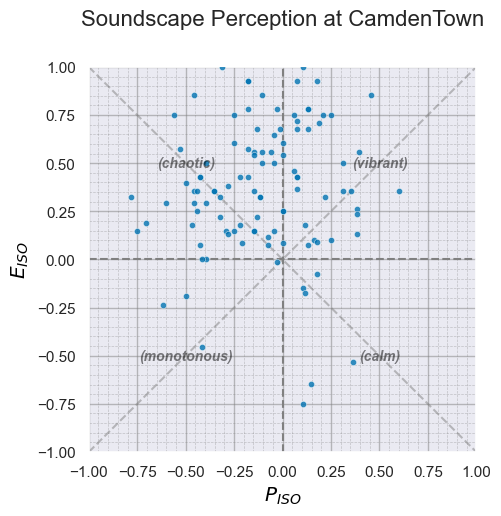

In [9]:
# Create a scatter plot with a single line of code
sspy.scatter(
    location_data,
    title=f"Soundscape Perception at {location_id}",
    diagonal_lines=True,  # Add diagonal lines for the circumplex model
)
plt.show()

That's it! With just one line of code, we've created a professional-looking scatter plot with:
- Properly labeled axes
- A clear title
- Diagonal lines showing the circumplex model
- Appropriate axis limits
- A clean, readable design

### 3.2 Density Plots

For a more sophisticated visualization that shows the distribution of perceptions, we can use a density plot:

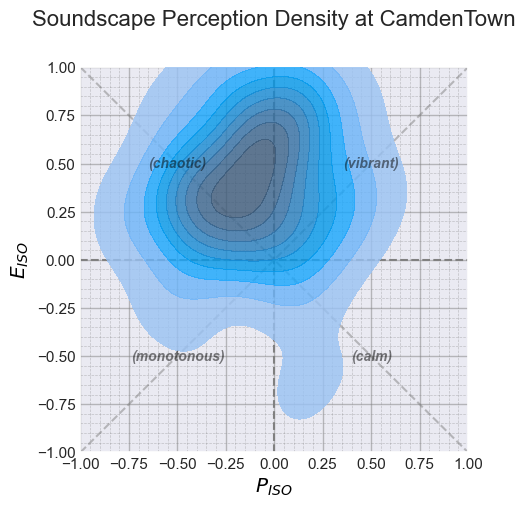

In [10]:
# Create a density plot with a single line of code
sspy.density(
    location_data,
    title=f"Soundscape Perception Density at {location_id}",
    diagonal_lines=True,
    fill=True,  # Fill the contours with color
    incl_scatter=False,  # Do not include scatter points
)
plt.show()

### 3.3 Combined Plots

Soundscapy also makes it easy to create combined plots that show both individual data points and the overall distribution:

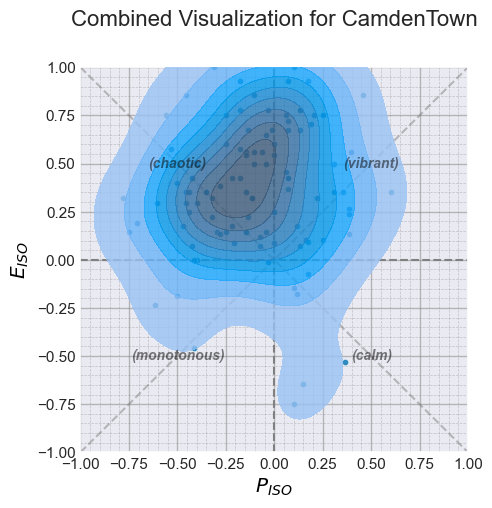

In [11]:
# Create a combined scatter and density plot
sspy.iso_plot(
    location_data,
    title=f"Combined Visualization for {location_id}",
    plot_layers=["scatter", "density"],  # Include both scatter and density layers
    diagonal_lines=True,
)
plt.show()

### 3.4 Comparing Multiple Locations

One common task in soundscape analysis is comparing perceptions across different locations. Soundscapy makes this easy:

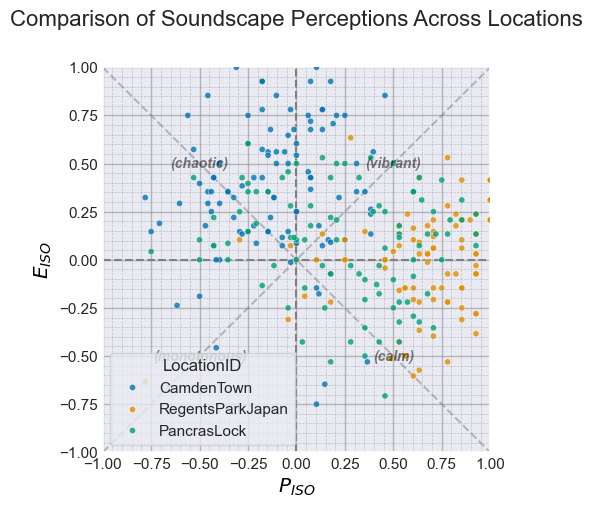

In [12]:
# Select data for multiple locations
locations = ["CamdenTown", "RegentsParkJapan", "PancrasLock"]
multi_location_data = pd.concat(
    [sspy.databases.isd.select_location_ids(valid_data, loc) for loc in locations]
)

# Create a scatter plot with locations as hue
sspy.scatter(
    multi_location_data,
    title="Comparison of Soundscape Perceptions Across Locations",
    hue="LocationID",  # Color points by location
    diagonal_lines=True,
)
plt.show()

### 3.5 Creating Multi-panel Visualizations

For a more detailed comparison, we can create multi-panel visualizations:

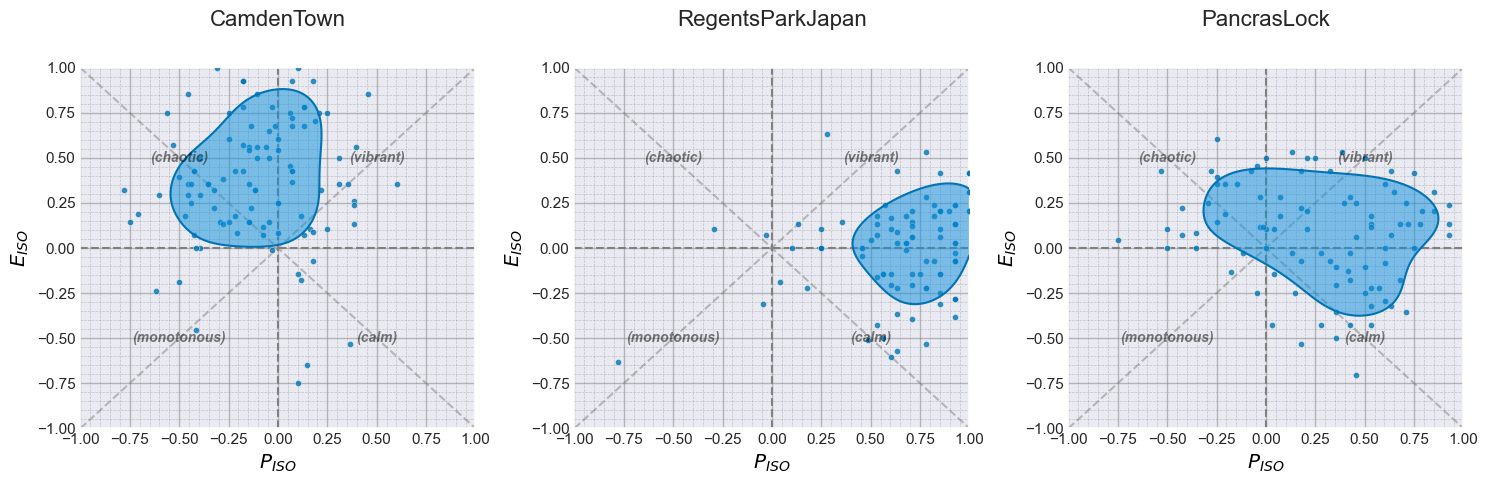

In [13]:
# Create a figure with subplots for each location
fig, axes = plt.subplots(1, len(locations), figsize=(15, 5))

# Plot each location in its own subplot
for i, location in enumerate(locations):
    location_data = sspy.databases.isd.select_location_ids(valid_data, location)

    # Use iso_plot for each subplot
    sspy.iso_plot(
        location_data,
        title=location,
        plot_layers=["scatter", "simple_density"],
        diagonal_lines=True,
        ax=axes[i],
    )

plt.tight_layout()
plt.show()

## 4. Understanding the Soundscape Perception Index (SPI)

The Soundscape Perception Index (SPI) is a powerful metric for comparing soundscape distributions. It quantifies the similarity between two soundscape distributions on a scale from 0 to 100.

### 4.1 Creating Multi-dimensional Skewed Normal Distributions

To calculate the SPI, we first need to fit multi-dimensional skewed normal (MSN) distributions to our data:

In [53]:
# Import the MultiSkewNorm class
from soundscapy.spi import MultiSkewNorm

# Select data for two locations to compare
location1 = "StPaulsCross"
location2 = "StPaulsRow"

data1 = sspy.databases.isd.select_location_ids(valid_data, location1)

# Fit MSN distributions to both locations
msn1 = MultiSkewNorm()
msn1.fit(data=data1[["ISOPleasant", "ISOEventful"]])
msn1.sample_mtsn(1000)

print(f"MSN parameters for {location1}:")
print()
print(msn1.cp)
print()
print(msn1.dp)

MSN parameters for StPaulsCross:

Centred Parameters:
mean:  [0.357 0.139]
sigma: [[ 0.11  -0.024]
 [-0.024  0.081]]
skew:  [-0.575 -0.011]

Direct Parameters:
xi:    [0.722 0.223]
omega: [[0.243 0.007]
 [0.007 0.088]]
alpha: [-4.448 -1.511]


/var/folders/6t/7h8wn9n92w5f24ml_bkwck9m0000gn/T/ipykernel_7637/3780781094.py:9: ExperimentalWarning: `ISOPlot` is currently under development and should be considered experimental. `ISOPlot` implements an experimental API for creating layered soundscape circumplex plots. Use with caution.
  ISOPlot()


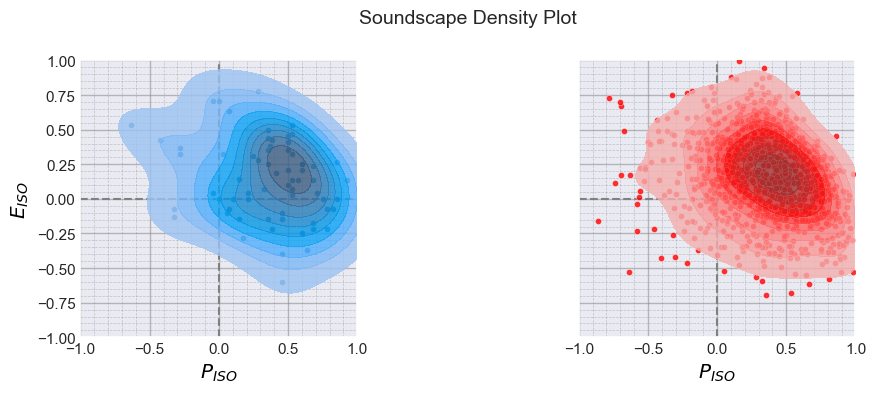

In [54]:
from soundscapy import ISOPlot

fitted_data = pd.DataFrame(
    {
        "ISOPleasant": msn1.sample_data[:, 0],
        "ISOEventful": msn1.sample_data[:, 1],
    }
)

p = (
    ISOPlot()
    .create_subplots(nrows=1, ncols=2, figsize=(8, 4), subplot_titles=[""])
    .add_scatter(data=data1, on_axis=0)
    .add_scatter(data=fitted_data, on_axis=1, color="red")
    .add_density(data=data1, on_axis=0)
    .add_density(data=fitted_data, on_axis=1, color="red")
    .style()
)
plt.tight_layout()
p.show()

In [55]:
data2 = sspy.databases.isd.select_location_ids(valid_data, location2)

msn2 = MultiSkewNorm()
msn2.fit(data=data2[["ISOPleasant", "ISOEventful"]])
print(f"\nMSN parameters for {location2}:")
print(msn2.cp)
print(msn2.dp)


MSN parameters for StPaulsRow:
Centred Parameters:
mean:  [0.235 0.121]
sigma: [[ 0.119 -0.016]
 [-0.016  0.079]]
skew:  [-0.218  0.433]
Direct Parameters:
xi:    [ 0.511 -0.16 ]
omega: [[ 0.195 -0.094]
 [-0.094  0.158]]
alpha: [-1.52   2.324]


### 4.4 Creating a Target Distribution

One powerful application of the SPI is comparing actual soundscapes to a target or ideal distribution:

In [64]:
# Create a target distribution
target_msn = MultiSkewNorm()
target_msn.define_dp(
    xi=np.array([0.6, 0.2]),  # A pleasant but not too eventful soundscape
    omega=np.array([[0.08, 0.02], [0.02, 0.08]]),  # Scale matrix (spread)
    alpha=np.array([0, 0]),  # Symmetric distribution
)
target_msn.sample(n=1000)  # Generate sample data

# Calculate SPI against the target
spi1_location1 = target_msn.spi_score(data1[["ISOPleasant", "ISOEventful"]])
spi1_location2 = target_msn.spi_score(data2[["ISOPleasant", "ISOEventful"]])

print(f"SPI between {location1} and target: {spi1_location1}")
print(f"SPI between {location2} and target: {spi1_location2}")

SPI between MarchmontGarden and target: 42
SPI between StPaulsRow and target: 55


### 4.3 Visualizing the Comparison

Let's visualize the two distributions to better understand the SPI:

/var/folders/6t/7h8wn9n92w5f24ml_bkwck9m0000gn/T/ipykernel_7637/2387585925.py:18: ExperimentalWarning: `ISOPlot` is currently under development and should be considered experimental. `ISOPlot` implements an experimental API for creating layered soundscape circumplex plots. Use with caution.
  ISOPlot(title="Comparison of Soundscape Perceptions Against a Pleasant target")


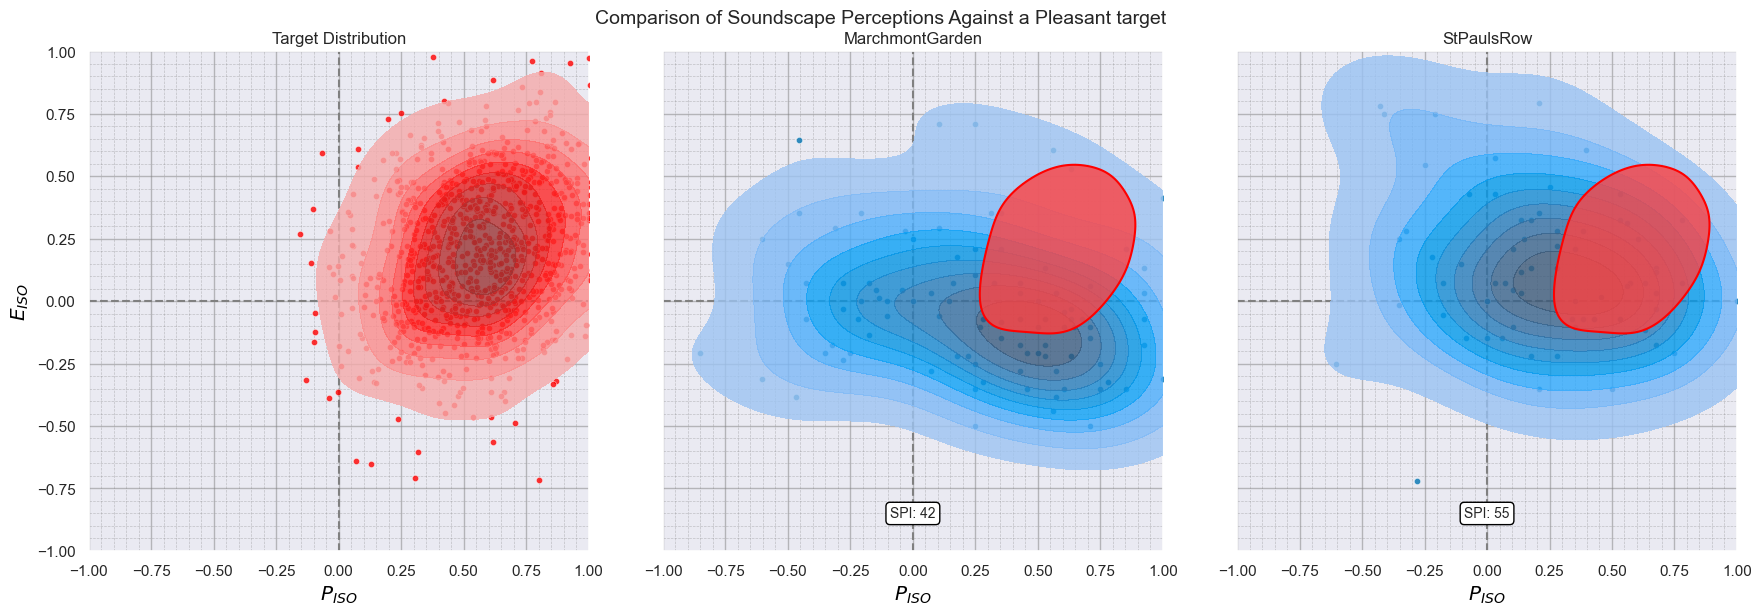

In [68]:
from soundscapy import ISOPlot

# Select data for two locations to compare
location1 = "MarchmontGarden"
location2 = "StPaulsRow"

data1 = sspy.databases.isd.select_location_ids(valid_data, location1)
data2 = sspy.databases.isd.select_location_ids(valid_data, location2)

target_df = pd.DataFrame(
    {
        "ISOPleasant": target_msn.sample_data[:, 0],
        "ISOEventful": target_msn.sample_data[:, 1],
    }
)

# Create a plot for the SPI scores
plot = (
    ISOPlot(title="Comparison of Soundscape Perceptions Against a Pleasant target")
    .create_subplots(
        nrows=1,
        ncols=3,
        figsize=(6, 6),
        subplot_datas=[target_df, data1, data2],
        subplot_titles=["Target Distribution", location1, location2],
    )
    .add_scatter(color="red", on_axis=0)
    .add_density(color="red", on_axis=0)
    .add_scatter(on_axis=1)
    .add_density(on_axis=1)
    .add_scatter(on_axis=2)
    .add_density(on_axis=2)
    .add_spi(on_axis=1, spi_target_data=target_df, show_score="on axis")
    .add_spi(on_axis=2, spi_target_data=target_df, show_score="on axis")
    .style()
)
plot.show()

# plot.add_data("CamdenTown", spi1_location1)
# plot.add_data("RegentsParkJapan", spi1_location2)
# plot.add_data("PancrasLock", spi_score)

## 5. Putting It All Together

Now that we've learned the basics of Soundscapy, let's put it all together in a complete analysis workflow:

1. Load and validate data
2. Calculate ISO coordinates
3. Visualize the data
4. Compare locations
5. Calculate SPI

Here's a complete example:

In [18]:
data = sspy.isd.load()
data.LocationID.unique()

array(['CarloV', 'SanMarco', 'PlazaBibRambla', 'CamdenTown', 'EustonTap',
       'Noorderplantsoen', 'MarchmontGarden', 'MonumentoGaribaldi',
       'TateModern', 'PancrasLock', 'TorringtonSq', 'RegentsParkFields',
       'RegentsParkJapan', 'RussellSq', 'StPaulsCross', 'StPaulsRow',
       'CampoPrincipe', 'MiradorSanNicolas', 'LianhuashanParkEntrance',
       'LianhuashanParkForest', 'PingshanPark', 'PingshanStreet',
       'ZhongshanPark', 'OlympicSquare', 'ZhongshanSquare',
       'DadongSquare'], dtype=object)

/var/folders/6t/7h8wn9n92w5f24ml_bkwck9m0000gn/T/ipykernel_7637/2230393470.py:22: ExperimentalWarning: `ISOPlot` is currently under development and should be considered experimental. `ISOPlot` implements an experimental API for creating layered soundscape circumplex plots. Use with caution.
  ISOPlot(locations_data)
/Users/mitch/Documents/GitHub/Soundscapy/src/soundscapy/plotting/iso_plot.py:503: UserWarning: This is an experimental feature. The number of rows and columns may not be optimal.
  self._allocate_subplot_axes(subplot_titles)


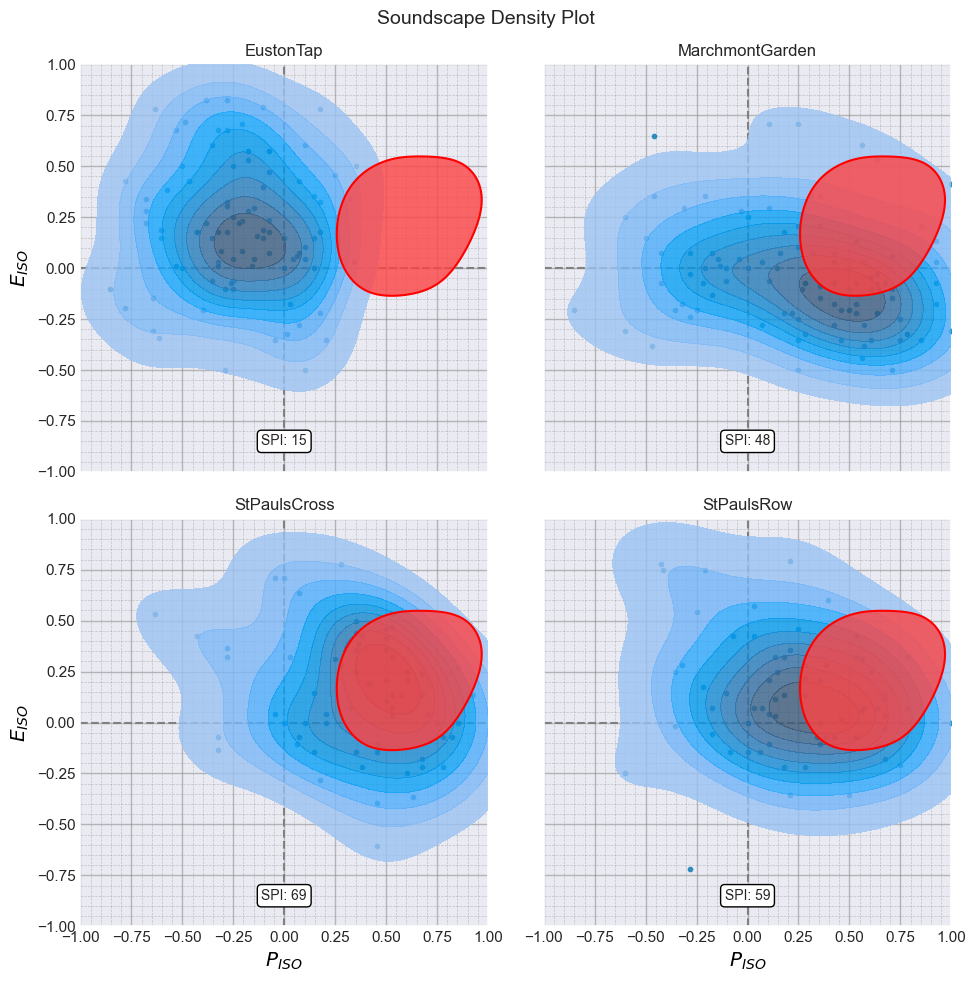

In [20]:
# 1. Load and validate data
data = sspy.databases.isd.load()
valid_data, _ = sspy.databases.isd.validate(data)

# 2. Calculate ISO coordinates
valid_data = sspy.surveys.add_iso_coords(valid_data)

# 3. Select locations to analyze
locations = ["EustonTap", "MarchmontGarden", "StPaulsCross", "StPaulsRow"]
locations_data = sspy.isd.select_location_ids(valid_data, locations)

# 4. Select a target distribution
target_msn = MultiSkewNorm()
target_msn.define_dp(
    xi=np.array([0.6, 0.2]),  # A pleasant but not too eventful soundscape
    omega=np.array([[0.1, 0.02], [0.02, 0.1]]),
    alpha=np.array([0, 0]),
)
target_msn.sample(n=1000)

plot = (
    ISOPlot(locations_data)
    .create_subplots(subplot_by="LocationID", auto_allocate_axes=True)
    .add_scatter()
    .add_density()
    .add_spi(spi_target_data=target_msn.sample_data, show_score="on axis")
    .style()
)
plot.show()

## Summary

In this tutorial, we've covered the basics of using Soundscapy for soundscape analysis:

1. **Python Basics**: We learned about variables, functions, packages, and DataFrames.

2. **Soundscape Data**: We saw how to load, validate, and process soundscape data.

3. **Visualization**: We created beautiful visualizations with just a single line of code.

4. **SPI**: We calculated and interpreted the Soundscape Perception Index.

The key takeaway is that Soundscapy makes complex soundscape analysis tasks simple. Instead of writing dozens of lines of code for each visualization or calculation, you can use Soundscapy's intuitive functions to accomplish the same tasks with just a few lines.

## Next Steps

Now that you've completed this quick start guide, you might want to explore:

1. **More Advanced Visualizations**: Check out the Advanced Visualization Techniques tutorial.

2. **Working with Different Databases**: Learn about the different soundscape databases available in Soundscapy.

3. **In-depth SPI Analysis**: Dive deeper into the Soundscape Perception Index and its applications.

4. **Custom Analysis Workflows**: Combine Soundscapy functions with your own code to create custom analysis workflows.

Happy soundscape analyzing!